### Problem 1 : Temperature Retested
Revisit the Farenheight<->Celsius conversion functions from Problem Sets 1 and 2.  

Write a series of tests for the conversion functions following the examples in Chapter 18 of ECP.  Run the test functions against your function from Problem Set 2 (copy your function into its own cell in this Problem Set).  

Exact_func: [  -4.   14.   32.   50.   68.   86.  104.  122.  140.  158.  176.  194.
  212.  230.  248.]
Exact_test: [-4.0, 14.0, 32.0, 50.0, 68.0, 86.0, 104.0, 122.0, 140.0, 158.0, 176.0, 194.0, 212.0, 230.0]
Estimate_func: [ -10.   10.   30.   50.   70.   90.  110.  130.  150.  170.  190.  210.
  230.  250.  270.]
Estimate test: [-10, 10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250]


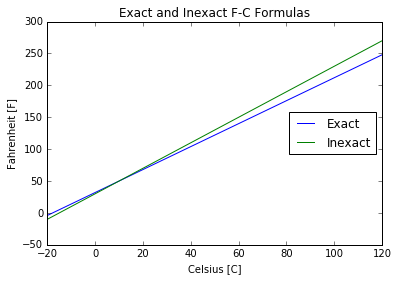

In [74]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def convert(n):
    C = np.linspace(-20, 120, n+1)
    y1 = 9/5*C + 32
    y2 = 2*C + 30

    plt.plot(C, y1, label="Exact")
    plt.plot(C, y2, label="Inexact")
    plt.ylabel("Fahrenheit [F]")
    plt.xlabel("Celsius [C]")
    plt.title("Exact and Inexact F-C Formulas")
    plt.legend(loc="right")
    
    return y1, y2

def test():
    y1, y2 = convert(14)
    C = np.array(range(-20, 120, 10))
    exact = [9/5*c + 32 for c in C]
    estimate = [2*c + 30 for c in C]
    print("Exact_func:", y1)
    print("Exact_test:", exact)
    print("Estimate_func:", y2)
    print("Estimate test:", estimate)

# I wasn't sure about the best way to test this function. I felt like this exercise was a little
# too trivial to make a test function, and I feel like my test function is pretty much doing
# the same thing as the actual function.
test()

### Problem 2 : Simple Integrals
Evaluate the following integrals analytically and numerically by Monte Carlo, the trapezoid rule, and Simpson's rule. Since we will do this several times in this problem set, please write functions `Monte_Carlo`, `trapezoid`, and `Simpsons`.

These functions should take as arguments:  
* the function to be integrated 
* the minimum x and maximum x to integrate over.
* the number of steps to use as arguments  

and return  

* the resulting estimate of the definite integral.  

a. For each rule, write test functions that tests both trivial and useful cases.  Carefully distinguish between testing for analytic agreement with the known answer vs. testing for proper behavior of the algorithm -- the algorithms are only approximation, but they are deterministically so.  This part will take some good selection of test cases and understanding of how the algorithms work.

b. Integrate each of: 
* $\int_0^{2} e^{-x} dx$ 
* $\int_{0.001}^2 \ln (x) dx$ (use natural logarithm)  

For each integral, write a function to return the results and error with each the three methods for a give number of steps, $N$. Verify that they give a reasonable answer for $N\sim 1000$.  

Which one of the integrands [(a) or (b)] converged more slowly and why?

In [85]:
import numpy as np

def f(x):
    return np.e**(-x)

def g(x):
    return np.log(x)

def Monte_Carlo(f, x_min, x_max, N, func_f=True):
    total = 0
    
    for i in range(N):
        x_i = np.random.uniform(x_min, x_max)
        total += f(x_i)
        
    result = total/N * (x_max - x_min)
    
    if func_f: 
        print('Monte Carlo on f Error:', abs(-np.exp(-2) + 1 - result))
    else:
        print('Monte Carlo on g Error:', abs(-0.605797884 - result))
        
    return result

print('Monte Carlo on f:', Monte_Carlo(f, 0, 2, 1000))
print('Monte Carlo on g:', Monte_Carlo(g, 0, 2, 1000, False))            

Monte Carlo on f Error: 0.00105428229223
Monte Carlo on f: 0.8636104344711576
Monte Carlo on g Error: 0.0821587110061
Monte Carlo on g: -0.687956595006


In [86]:
import numpy as np

def f(x):
    return np.e**(-x)

def trapezoid(f, x_min, x_max, N, func_f=True):
    
    # Create array of x values to use.
    x_i = np.linspace(x_min, x_max, N+1)
    
    # Create array of weights, adjusting the first and last weights.
    w_i = (x_max - x_min)/N * np.ones(N+1)
    w_i[0] /= 2
    w_i[-1] /=2
    
    # Return the summation, which in this case can be expressed as a dot product.
    result = np.dot(w_i, f(x_i))
    
    if func_f: 
        print('Trapezoid on f Error:', abs(-np.exp(-2) + 1 - result))
    else:
        print('Trapezoid on g Error:', abs(-0.605797884 - result))
        
    return result
    
print('Trapezoid on f:', trapezoid(f, 0, 2, 1000))
print('Trapezoid on g:', trapezoid(g, 0.001, 2, 1000, False))

Trapezoid on f Error: 2.88221553069e-07
Trapezoid on f: 0.864665004985
Trapezoid on g Error: 0.000306397371128
Trapezoid on g: -0.606104281371


In [88]:
import numpy as np

def f(x):
    return np.e**(-x)

def Simpsons(f, x_min, x_max, N, func_f=True):
    
    # Create array of x values to use.
    x_i = np.linspace(x_min, x_max, N+1)
    
    # Create an array of weights. All of them contain h/3, so I implemented that here. The
    # 'inside' weights need to be adjusted by alternately multiplying by 4 and 2.
    w_i = (x_max - x_min) /(3*N) * np.ones(N+1)
    
    for k in range(N//2):
        w_i[2*k + 1] *= 4
        w_i[2*k + 2] *= 2
        
    result = np.dot(w_i, f(x_i))
        
    if func_f: 
        print('Simpsons on f Error:', abs(-np.exp(-2) + 1 - result))
    else:
        print('Simpsons on g Error:', abs(-0.605797884 - result))
    
    return result

print('Simpsons on f:', Simpsons(f, 0, 2, 1000))
print('Simpsons on g:', Simpsons(g, 0.001, 2, 1000, False))

Simpsons on f Error: 9.02235222346e-05
Simpsons on f: 0.864754940286
Simpsons on g Error: 0.000416140499125
Simpsons on g: -0.605381743501


the log function converges slower because the function approaches -infinity as x approaches zero. So, the area close to the lower bound is thin and hard to approximate for small N. The exponential function does not do this on the interval we are considering.

### Problem 3 : $N$ Dependence
For each integral in Problem #3, plot the dependence of the error $\epsilon$ on the number of points $N$. Start with $N=N_{\rm min}$ and increase $N$ by a factor of $N_{\rm multiplier}$ until you get to at least $N=N_{\rm max}$. For each function, include a log-log plot of the error as a function of $N$ in your pdf with $N_{\rm min}=3$, $N_{\rm max}=10^7$, and $N_{\rm multiplier}=1.5$. Note that particularly with Simpson's rule, it is easy to reach the limit of the machine precision. In that case, the best accuracy is not obtained by letting $N\rightarrow\infty$, but by choosing a moderate value of $N$. What is the approximate optimal $N$ for Simpson's rule in each case (if you can reach it)? Use your plot to estimate the power-law dependence of $\epsilon$ on $N$ for each algorithm in each case. What are the differences between the two integrals and why?

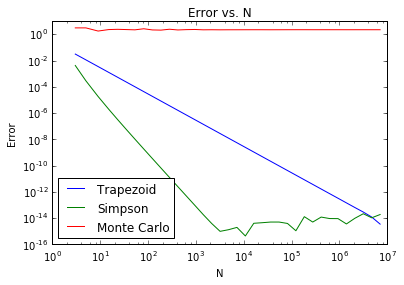

In [37]:
def dependence(f, x_min, x_max, N_min, N_max, N_multiplier, true_value):
    t_error = [ ]
    s_error = [ ]
    m_error = [ ]
    N = [ ]
    
    while N_min < N_max:
        t = trapezoid(f, x_min, x_max, N_min)
        s = Simpsons(f, x_min, x_max, N_min)
        m = Monte_Carlo(f, x_min, x_max, N_min)
        
        t_error.append(abs(t - true_value))
        s_error.append(abs(s - true_value))
        m_error.append(abs(m - true_value))
        
        N.append(N_min)
        
        N_min *= N_multiplier
        N_min = int(round(N_min))
        
        # N_min needs to be an odd number in order for Simpson's rule to work correctly!
        # If you don't make it odd, the graph on log/log scale is a straight line.
        if N_min % 2 == 0: N_min += 1
        
    plt.plot(N, t_error, label='Trapezoid')
    plt.plot(N, s_error, label='Simpson')
    plt.plot(N, m_error, label='Monte Carlo')
    plt.title('Error vs. N')
    plt.xlabel('N')
    plt.ylabel('Error')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(loc='best')
    plt.show()
    
dependence(f, 0, 2, 3, 10000000, 1.5, -np.exp(-2) + 1)
        
        

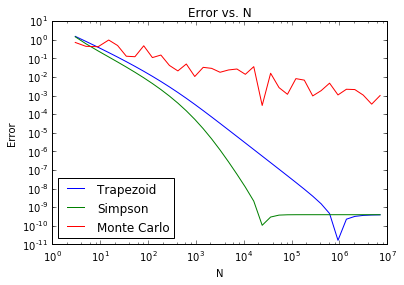

In [48]:
dependence(g, 0.001, 2, 3, 10000000, 1.5, -0.605797884)

Simpsons rule is optimized at N ~ 10^4.5. I think the most noteworthy difference between the two functions is that one is concave up and the other is concance down. The trapezoidal rule will undershoot on concave down functions and overshoot on concance up functions. 

Trapezoid: error decreased by a power of 10 as N increase by a power of 10
Simpsons:  error decreased by 1.5 powers of 10 as N increased by a power of 10 (on average at least)
Monte Carlo: error decreased by a power of 10 as N increased by 2 power of 10

### Problem 4 : Oscillating Integrands
Try two integrals for which the answers are less obvious:

* $\int_0^{10} \sin{\pi x^2} \ dx$  ("exact" value $=0.33763801721661869118$)
* $\int_0^{2\pi} \sin^4{100 x} \ dx$ (exact value $=\frac{3\pi}{4}$)

Try to integrate these by Monte Carlo, the trapezoid rule, and Simpson's rule. How do the result and error depend on the number of steps in each? Start with $N=N_{\rm min}$ and increase $N$ by a factor of $N_{\rm multiplier}$ until you get to at least $N=N_{\rm max}$. For each function, include a log-log plot of the error as a function of $N$ in your pdf with $N_{\rm min}=3$, $N_{\rm max}=10^7$, and $N_{\rm multiplier}=1.5$. Explain what is different about these integrals and why. Why might computers have trouble evaluating integrals like these?

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def h(x):
    return np.sin(np.pi*x**2)

def k(x):
    return np.sin(100*x)**4

print("fuction h using trapezoid. N = 100:", trapezoid(h, 0, 10, 100))
print("fuction h using trapezoid. N = 1000:", trapezoid(h, 0, 10, 1000))

print("fuction h using Simpsons. N = 100:", Simpsons(h, 0, 10, 100))
print("fuction h using Simpsons. N = 1000:", Simpsons(h, 0, 10, 1000))

print("fuction h using Monte Carlo. N = 100:", Monte_Carlo(h, 0, 10, 100))
print("fuction h using Monte Carlo. N = 1000:", Monte_Carlo(h, 0, 10, 1000))


print("fuction k using trapezoid. N = 100:", trapezoid(k, 0, 2*np.pi, 100))
print("fuction k using trapezoid. N = 1000:", trapezoid(k, 0, 2*np.pi, 1000))

print("fuction k using Simpsons. N = 100:", Simpsons(k, 0, 2*np.pi, 100))
print("fuction k using Simpsons. N = 1000:", Simpsons(k, 0, 2*np.pi, 1000))

print("fuction k using Monte Carlo. N = 100:", Monte_Carlo(k, 0, 2*np.pi, 100))
print("fuction k using Monte Carlo. N = 1000:", Monte_Carlo(k, 0, 2*np.pi, 1000))


fuction h using trapezoid. N = 100: 0.707106781187
fuction h using trapezoid. N = 1000: 0.338165093839
fuction h using Simpsons. N = 100: 0.932347345249
fuction h using Simpsons. N = 1000: 0.338708811585
fuction h using Monte Carlo. N = 100: 0.368369518884
fuction h using Monte Carlo. N = 1000: 0.14195512631
fuction k using trapezoid. N = 100: 3.96392225025e-53
fuction k using trapezoid. N = 1000: 2.35619449019
fuction k using Simpsons. N = 100: 2.35619449019
fuction k using Simpsons. N = 1000: 2.35619449019
fuction k using Monte Carlo. N = 100: 2.2800046273
fuction k using Monte Carlo. N = 1000: 2.27577715007


These integrals are different because the integrands are wildy oscillating functions. When N is small, this causes problems because the distance between points is relatively large, and it gives the computer an inaccurate representation of the function. This problem becauses less of an issue when N gets larger.

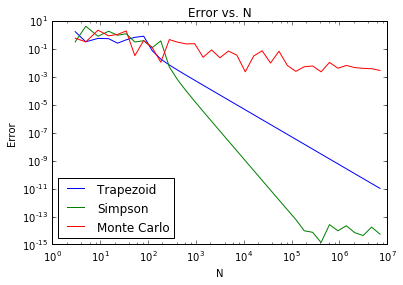

In [60]:
dependence(h, 0, 10, 3, 10000000, 1.5, 0.33763801721661869118)

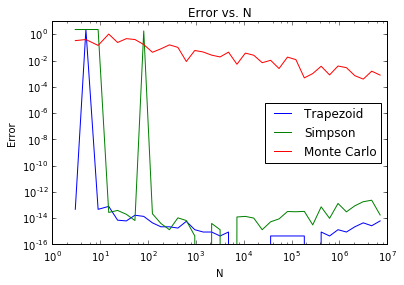

In [61]:
dependence(k, 0, 2*np.pi, 3, 10000000, 1.5, 3/4*np.pi)

### Problem 5 : Compute $\pi$ by a Monte Carlo Method
Compute $\pi$ by computing the area of a circle with radius 1, so the area is $\pi$. The approach is to randomly pick $x$ and $y$ values in $[-1, 1]$, and imagine that this represents a point in a square with an inscribed circle of radius 1. The point $(x, y)$ lies within the circle if $x^2 + y^2 < 1$. The probability of any point landing in the circle is just the ratio of the areas, $P = A_{\rm circle}/A_{\rm square} = \pi/4$. With $N$ trials, you can get a measurement of $P$ and use that to calculate $\pi$.  
Use random sampling to perform a 2-D integration and thereby determine $\pi$ with the following steps:

* Imagine a circular pond enclosed in a square of side 2 $(r = 1)$.
* We know the analytic area of the circle $\int dA = \pi$.
* Generate a sequence of random numbers $-1 \leq r_i \leq +1$.
* For $i = 1$ to $N$, pick $(x_i, y_i) = (r_{2i-1}, r_{2i})$.
* If $x_i^2 + y_i^2 < 1$, let $N_{\rm pond} = N_{\rm pond} + 1$, otherwise let $N_{\rm box} = N_{\rm box} + 1$.
* Use $A_{\rm pond}=\frac{N_{\rm pond}}{N_{\rm pond}+N_{\rm box}}A_{\rm box}$ to calculate the area, and in this way $\pi$. Print the result and the difference from `math.pi`. 

How large does $N$ need to be to get 3 significant digits of $\pi$?

In [49]:
import numpy as np

def pi_approx(N):
    inside = 0
    outside = 0
    
    for i in range(N):
        x, y = np.random.uniform(-1, 1), np.random.uniform(-1, 1)
        
        if x**2 + y**2 < 1:
            inside += 1
        else:
            outside += 1
            
    return inside / (inside + outside) * 4

pi_approx(100001)

3.144008559914401

N needs to be about 100000 to have a decent chance of getting 3 significant digits.